<a href="https://colab.research.google.com/github/Matasnet/Analiza-Klient-w-i-Sprzeda-y-w-Sklepie-z-Bi-uteri-/blob/main/Analiza_Klient%C3%B3w_i_Sprzeda%C5%BCy_w_Sklepie_z_Bi%C5%BCuteri%C4%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Przedstawione dane są wygenerowane za pomocą biblioteki Faker. Pierwszym krokiem jest jej instalacja.

In [73]:
!pip install Faker

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ustawiamy paramatery takie jak ilość transakcji, kategorię produktów oraz województwa z których mogą być klienci.

In [75]:
# Parametry
num_transactions = 1000  # Liczba transakcji
categories = ['Pierścionki', 'Naszyjniki', 'Bransoletki', 'Kolczyki', 'Zegarki']
wojewodztwa = [
    'Dolnośląskie', 'Kujawsko-pomorskie', 'Lubelskie', 'Lubuskie', 'Łódzkie',
    'Małopolskie', 'Mazowieckie', 'Opolskie', 'Podkarpackie', 'Podlaskie',
    'Pomorskie', 'Śląskie', 'Świętokrzyskie', 'Warmińsko-mazurskie',
    'Wielkopolskie', 'Zachodniopomorskie'
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generujemy dane

In [76]:
# Generowanie danych
data = {
    'ID_Transakcji': np.arange(1, num_transactions+1),
    'ID_Klienta': [fake.random_int(min=1, max=500) for _ in range(num_transactions)],
    'Data': [fake.date_between(start_date='-2y', end_date='today') for _ in range(num_transactions)],
    'Kategoria': [random.choice(categories) for _ in range(num_transactions)],
    'Ilosc': [fake.random_int(min=1, max=5) for _ in range(num_transactions)],
    'Cena_Jednostkowa': [fake.random_int(min=50, max=1000) for _ in range(num_transactions)],
    'Wojewodztwo': [random.choice(wojewodztwa) for _ in range(num_transactions)],
    'Kanal': [random.choice(['Web', 'Mobile App']) for _ in range(num_transactions)]
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
# Tworzenie DataFrame
df = pd.DataFrame(data)

# Obliczanie wartości transakcji
df['Wartosc'] = df['Ilosc'] * df['Cena_Jednostkowa']

# Ustawiamy aby tabela z danymi wyświetała się na szerokość
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)


# Podgląd danych
print(df.head())
print('\n')
print(df.tail())

   ID_Transakcji  ID_Klienta        Data    Kategoria  Ilosc  Cena_Jednostkowa     Wojewodztwo       Kanal  Wartosc
0              1         498  2024-03-09      Zegarki      4               449       Podlaskie         Web     1796
1              2         367  2023-12-20     Kolczyki      4               893    Podkarpackie  Mobile App     3572
2              3         374  2022-10-28  Pierścionki      3               624  Świętokrzyskie         Web     1872
3              4         448  2024-08-21     Kolczyki      2               643       Lubelskie  Mobile App     1286
4              5         481  2023-08-18  Pierścionki      5               567     Mazowieckie         Web     2835


     ID_Transakcji  ID_Klienta        Data    Kategoria  Ilosc  Cena_Jednostkowa         Wojewodztwo       Kanal  Wartosc
995            996         210  2022-10-16  Bransoletki      4               646  Zachodniopomorskie  Mobile App     2584
996            997          35  2023-07-08      Zegarki   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Wizualizacja danych

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-79-7d3d9883868c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Data').resample('M')['Wartosc'].sum().plot(kind='line', figsize=(10, 6))


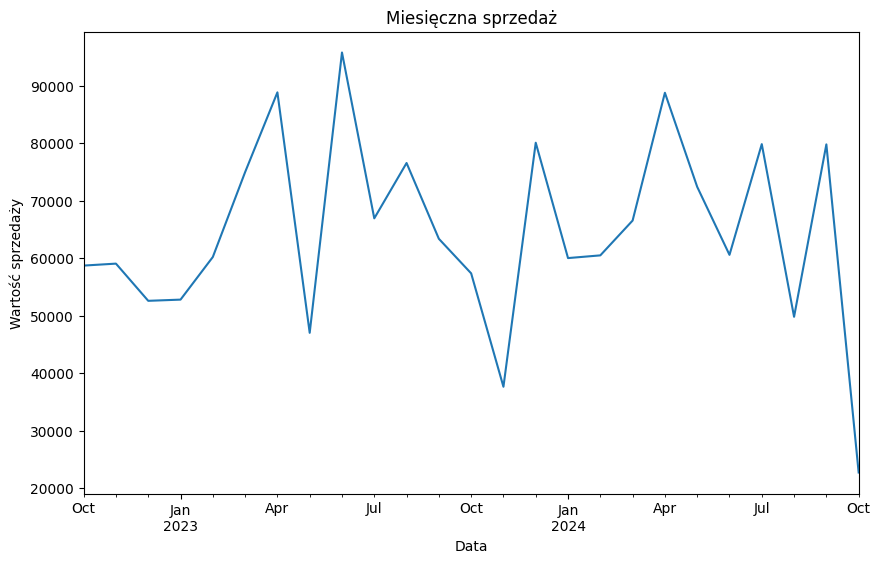

In [79]:
# Rozkład transakcji w czasie
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data').resample('M')['Wartosc'].sum().plot(kind='line', figsize=(10, 6))
plt.title('Miesięczna sprzedaż')
plt.ylabel('Wartość sprzedaży')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


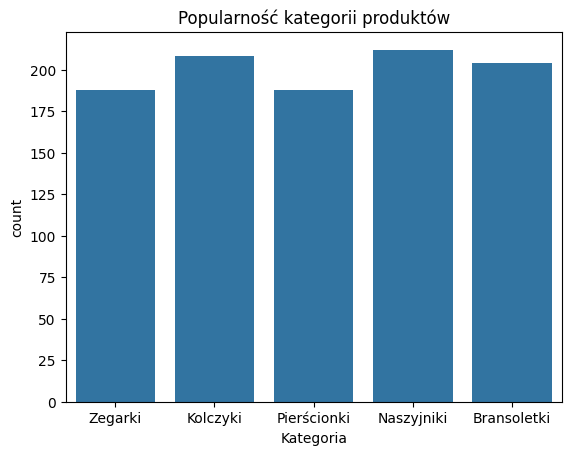

In [80]:
# Popularność kategorii
sns.countplot(data=df, x='Kategoria')
plt.title('Popularność kategorii produktów')
plt.show()

#Przygotowani danych do stworzenia modelu statystycznego klienta

In [81]:
# Średnia liczba transakcji na klienta
avg_transactions_per_customer = df.groupby('ID_Klienta')['ID_Transakcji'].count().mean()
print(f"Średnia liczba transakcji na klienta: {avg_transactions_per_customer:.2f}")


Średnia liczba transakcji na klienta: 2.32


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# Średnia wartość koszyka (na transakcję)
avg_basket_value = df['Wartosc'].mean()
print(f"Średnia wartość koszyka: {avg_basket_value:.2f} PLN")


Średnia wartość koszyka: 1612.65 PLN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
# Najczęściej kupowane produkty
most_popular_products = df['Kategoria'].value_counts().idxmax()
print(f"Najczęściej kupowana kategoria produktów: {most_popular_products}")


Najczęściej kupowana kategoria produktów: Naszyjniki


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# Preferencje zakupowe (kanały)
channel_preference = df['Kanal'].value_counts(normalize=True) * 100
print("Preferencje zakupowe (kanały):")
print(channel_preference)


Preferencje zakupowe (kanały):
Kanal
Web           51.9
Mobile App    48.1
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Rozkład klientów według województw
customer_distribution_by_region = df['Wojewodztwo'].value_counts()
print("Rozkład klientów według województw:")
print(customer_distribution_by_region)


Rozkład klientów według województw:
Wojewodztwo
Podlaskie              76
Lubelskie              72
Łódzkie                71
Pomorskie              70
Zachodniopomorskie     67
Dolnośląskie           63
Opolskie               63
Małopolskie            62
Śląskie                61
Podkarpackie           59
Lubuskie               59
Świętokrzyskie         58
Warmińsko-mazurskie    57
Wielkopolskie          56
Mazowieckie            54
Kujawsko-pomorskie     52
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Model statystycznego klienta

In [86]:
# Tworzenie profilu statystycznego klienta
print("Profil statystycznego klienta:")
print(f"- Średnia liczba transakcji na klienta: {avg_transactions_per_customer:.2f}")
print(f"- Średnia wartość koszyka: {avg_basket_value:.2f} PLN")
print(f"- Najczęściej kupowane produkty: {most_popular_products} \n")
print("Preferencje zakupowe (kanały):")
print(channel_preference)
print("\nRozkład klientów według województw:")
print(customer_distribution_by_region)


Profil statystycznego klienta:
- Średnia liczba transakcji na klienta: 2.32
- Średnia wartość koszyka: 1612.65 PLN
- Najczęściej kupowane produkty: Naszyjniki 

Preferencje zakupowe (kanały):
Kanal
Web           51.9
Mobile App    48.1
Name: proportion, dtype: float64

Rozkład klientów według województw:
Wojewodztwo
Podlaskie              76
Lubelskie              72
Łódzkie                71
Pomorskie              70
Zachodniopomorskie     67
Dolnośląskie           63
Opolskie               63
Małopolskie            62
Śląskie                61
Podkarpackie           59
Lubuskie               59
Świętokrzyskie         58
Warmińsko-mazurskie    57
Wielkopolskie          56
Mazowieckie            54
Kujawsko-pomorskie     52
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sprawdzanie jacy klienci robili więcej niż 1 tranzację

In [87]:
df['ID_Klienta'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
ID_Klienta,
388,7
270,7
176,7
444,6
251,6
...,...
74,1
300,1
337,1


Przykładowe sprawdzenie klienta o ID 388

In [96]:
df[df['ID_Klienta'] == 388]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID_Transakcji,ID_Klienta,Data,Kategoria,Ilosc,Cena_Jednostkowa,Wojewodztwo,Kanal,Wartosc
178,179,388,2024-07-27,Naszyjniki,4,822,Mazowieckie,Mobile App,3288
332,333,388,2024-02-06,Pierścionki,1,745,Podkarpackie,Web,745
357,358,388,2024-05-14,Bransoletki,2,145,Łódzkie,Web,290
371,372,388,2024-01-13,Zegarki,2,433,Warmińsko-mazurskie,Mobile App,866
403,404,388,2022-10-13,Kolczyki,5,539,Mazowieckie,Web,2695
779,780,388,2024-09-13,Bransoletki,5,984,Śląskie,Web,4920
834,835,388,2023-10-17,Pierścionki,3,621,Zachodniopomorskie,Mobile App,1863
